<a href="https://colab.research.google.com/github/jmattew/GOAT-stuff/blob/master/HubbleConstantWithAgeSupernovae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #import numpy package which allows us to make mathematical operations in python
import matplotlib.pyplot as plt # import a python package for plotting a graph

In [3]:
import astropy.io.ascii # import a python package so we can read files
import astropy.units as u# import a python package to call certain units
import astropy.constants as ac# import a python package to call certain constants

In [4]:
# code that allows us to upload a file with data points so it can be read
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [5]:
dat = astropy.io.ascii.read("Tonry_2003.vot") # read the uploaded file

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

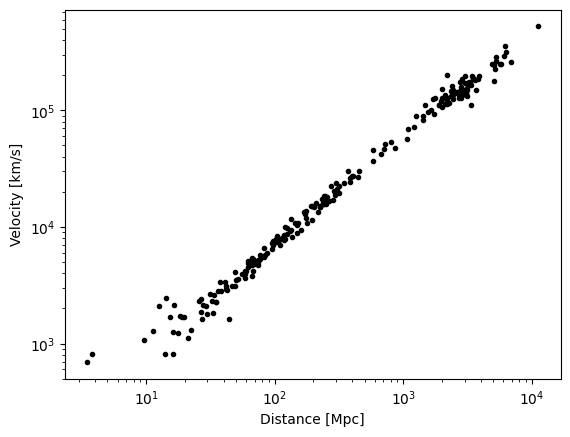

In [6]:
distance = 10**dat["col8"] / 72.0 * u.mpc #get the supernova's distance from us
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc # calculate possible error for the distance value
velocity = 10**dat["col7"] * u.km / u.s # get the velocity of the supernova in km/s
#plot the graph based on the calculated points
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

Text(0, 0.5, 'Velocity [km/s]')

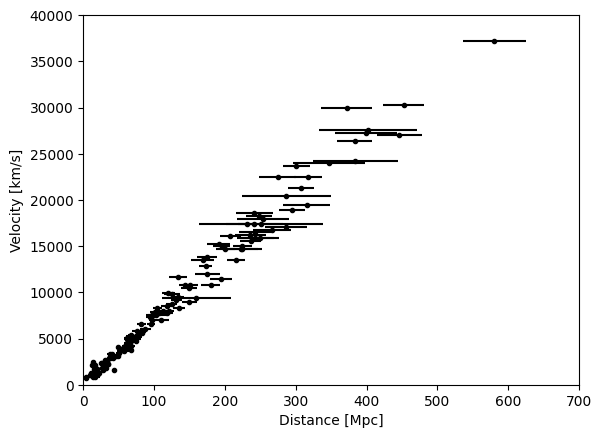

In [7]:
#plot the graph with the error calculations
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

Text(50, 30000, '=67.48 km/s/Mpc')

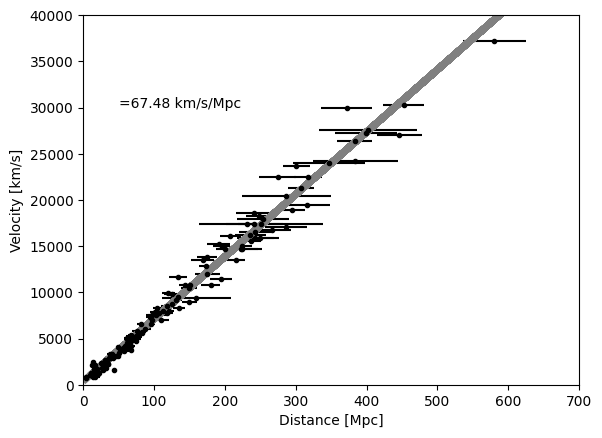

In [8]:
# add a linear line of best fit over the data values
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 700))
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1)
p = np.poly1d(z)
velocity_model = p(distance.to(u.mpc).value)

#plot the graph with the original data points, the error bar and the line of best fit
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=5)
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate("={0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000))

In [9]:
print("Slope = ", z[0], " in km/s/Mpc, This represents the Hubble Constant") # print out the Hubble constamt value based on the data points
print("Y-intercept = ", z[1], " in km/s at level 0, i.e., 0 Mpc") # print out the y-intercept based on the data points

Slope =  67.48137250840927  in km/s/Mpc, This represents the Hubble Constant
Y-intercept =  355.24954905559264  in km/s at level 0, i.e., 0 Mpc


In [10]:
Hubble = z[0] *u.km/u.s/u.Mpc# define Hubble constant
# convert Hubble constant to seconds by converting megaparsec to km
Hubble = Hubble / ((3.086 * (10**19))*u.km/u.Mpc)
age = 1 / Hubble # define variable for age of universe using age of universe equation
age = age / 60 / 60 / 24 / 365 * 1/u.s * u.yr# convert age to years
print(age) # print age

14501248926.094831 yr
